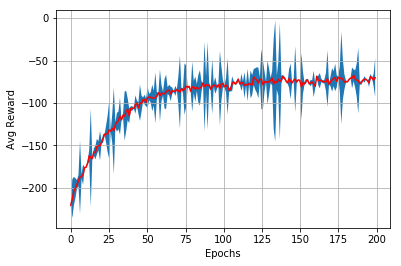

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

file_name_1 = 'Results_DQN_acrobot_test1'

with open(file_name_1, 'rb') as file:
    avgReward1 = pickle.load(file)
    
file_name_2 = 'Results_DQN_acrobot_test2'

with open(file_name_2, 'rb') as file:
    avgReward2 = pickle.load(file)
    
x = np.linspace(0,199,199)   
AvgReward  = [avgReward1,avgReward2] 
AvgReward = np.array(AvgReward)
mean = np.mean(AvgReward,0)
var = np.var(AvgReward,0)


plt.fill_between(x,mean + 1.5*var, mean-1.5*var)
plt.plot(x,mean,'r')
plt.grid(axis='both')
plt.xlabel('Epochs')
plt.ylabel('Avg Reward')
plt.show()

The Next Plot is generated using different shaped reward function

cost  = self.L1*np.cos(abs(th_1) - np.pi) + self.L2*np.cos(abs(th_1 + th_2) - np.pi)

produces almost similar performance, but however there is no penalty on angular velocity which leads some jitters in balance.

The Network weights and Avgreward vector are provided in DQN_results folder.

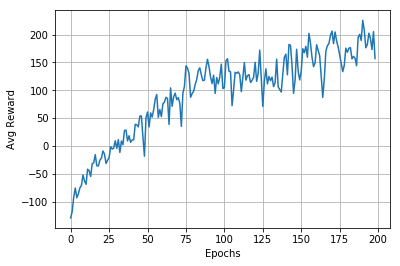

In [5]:
file_name_3 = 'Results_DQN_acrobot_test6'

with open(file_name_3, 'rb') as file:
    avgReward3 = pickle.load(file)
    
plt.plot(avgReward3)
plt.grid(axis='both')
plt.xlabel('Epochs')
plt.ylabel('Avg Reward')
plt.show()

INFO:tensorflow:Restoring parameters from DQN_Results/acrobotDQN_net_test6


/home/girish/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


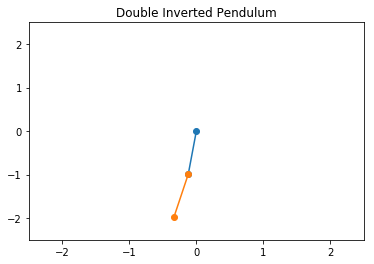

In [8]:
import numpy as np 
import tensorflow as tf 
from Double_InvertedPend_v0 import doublePendulum
%matplotlib inline

env = doublePendulum()

state_dim = 6
action_dim = 3

def DQN(w1,w2,w3,b1,b2,b3):

        inputs = tf.placeholder(tf.float32,[None,state_dim], name='inputs')
        
        # Create the 1st layer of Neural Network
        h1 = tf.nn.tanh(tf.matmul(inputs,w1) + b1) 

        # Create the 2nd Layer of Neural Nework (Action Inserted in the second layer)
        h2 = tf.nn.tanh(tf.matmul(h1,w2) + b2)

        # Create the output layer of the Neural Network
        out = tf.add(tf.matmul(h2,w3), b3, name='Net_output')

        return inputs, out

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('DQN_Results/acrobotDQN_net_test6.meta')
    saver.restore(sess,tf.train.latest_checkpoint('DQN_Results'))
    w1 = sess.run('w1:0')
    w2 = sess.run('w2:0')
    w3 = sess.run('w3:0')
    b1 = sess.run('b1:0')
    b2 = sess.run('b2:0')
    b3 = sess.run('b3:0')

    inputs, out = DQN(w1,w2,w3,b1,b2,b3)
    s = env.reset()
    for i in range(500):
        env.render()
        Qval = sess.run(out, feed_dict={inputs:np.reshape(s,(1,state_dim))})
        action = np.argmax(Qval)
        s1,r,done = env.step(action)
        s = s1
        if done:
            break